# -----------------------------------------------------
# Task 3: Cross-Country Comparison
# Notebook: compare_countries.ipynb
# Branch: compare-countries
# -----------------------------------------------------

# Step 1: Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Inline plotting (for Jupyter)

In [2]:
%matplotlib inline

print("✅ Libraries imported successfully")

✅ Libraries imported successfully


# -----------------------------------------------------
# Step 2: Load Cleaned Datasets
# -----------------------------------------------------

In [3]:
data_files = {
    "Benin": "../data/benin_clean.csv",
    "Sierra Leone": "../data/sierraleone_clean.csv",
    "Togo": "../data/togo_clean.csv"
}

dfs = {}
for country, path in data_files.items():
    try:
        df = pd.read_csv(path, parse_dates=['Timestamp'])
        df['Country'] = country
        dfs[country] = df
        print(f"✅ Loaded {country}: {df.shape}")
    except Exception as e:
        print(f"❌ Failed to load {country}: {e}")

# Combine all datasets
combined_df = pd.concat(dfs.values(), ignore_index=True)
print(f"\n✅ Combined dataset shape: {combined_df.shape}")
display(combined_df.head())

✅ Loaded Benin: (517776, 20)
✅ Loaded Sierra Leone: (509062, 20)
✅ Loaded Togo: (222458, 20)

✅ Combined dataset shape: (1249296, 20)


,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments,Country
0,2021-08-09 00:01:00,0.0,0.0,0.0,0.0,0.0,26.2,93.4,0.0,0.4,0.1,122.1,0.0,998,0,0.0,26.3,26.2,NaN,Benin
1,2021-08-09 00:02:00,0.0,0.0,0.0,0.0,0.0,26.2,93.6,0.0,0.0,0.0,0.0,0.0,998,0,0.0,26.3,26.2,NaN,Benin
2,2021-08-09 00:03:00,0.0,0.0,0.0,0.0,0.0,26.2,93.7,0.3,1.1,0.5,124.6,1.5,997,0,0.0,26.4,26.2,NaN,Benin
3,2021-08-09 00:04:00,0.0,0.0,0.0,0.0,0.0,26.2,93.3,0.2,0.7,0.4,120.3,1.3,997,0,0.0,26.4,26.3,NaN,Benin
4,2021-08-09 00:05:00,0.0,0.0,0.0,0.0,0.0,26.2,93.3,0.1,0.7,0.3,113.2,1.0,997,0,0.0,26.4,26.3,NaN,Benin


# -----------------------------------------------------
# Step 3: Metric Comparison (Boxplots)
# -----------------------------------------------------

C:\Users\321\AppData\Local\Temp\ipykernel_9908\2920935314.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Country', y=metric, data=combined_df, palette='Set2')


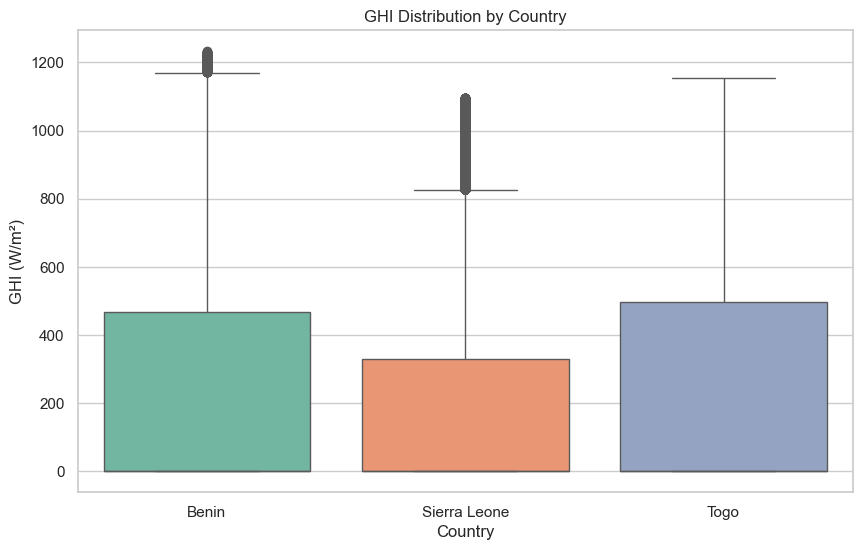

C:\Users\321\AppData\Local\Temp\ipykernel_9908\2920935314.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Country', y=metric, data=combined_df, palette='Set2')


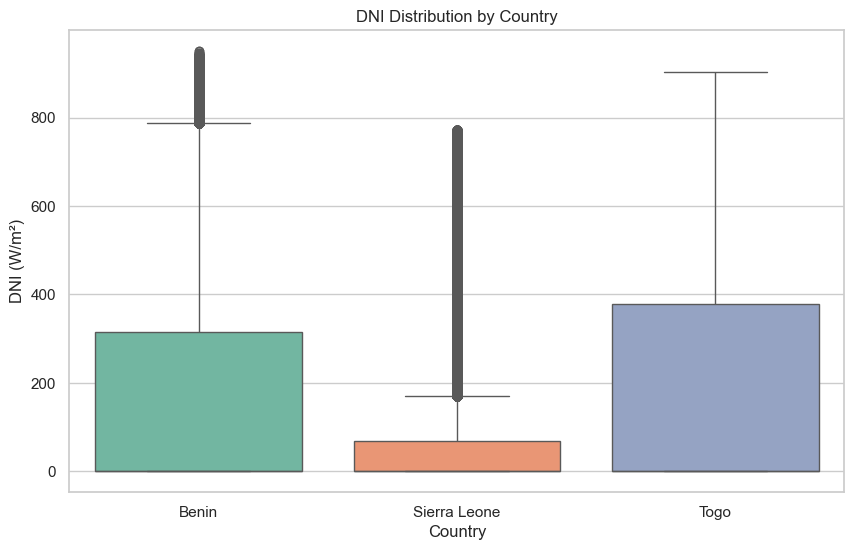

C:\Users\321\AppData\Local\Temp\ipykernel_9908\2920935314.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Country', y=metric, data=combined_df, palette='Set2')


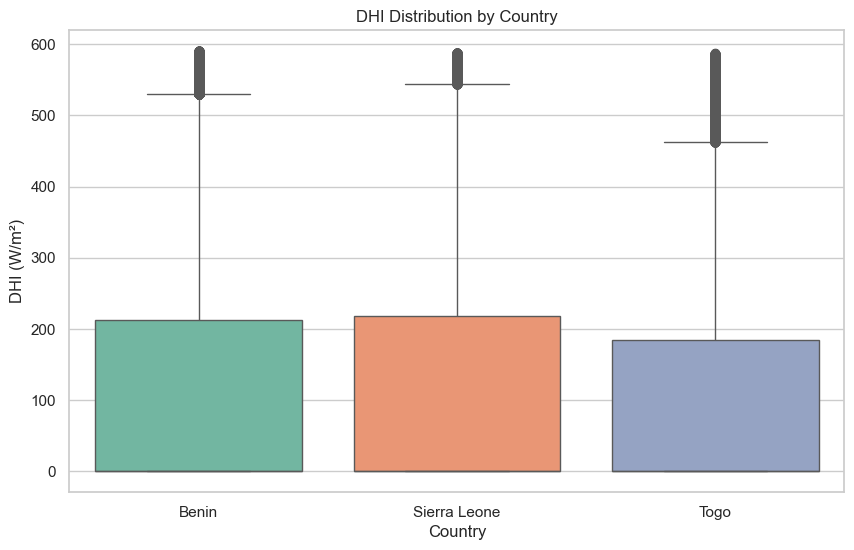

✅ Step 3: Metric Comparison Boxplots displayed


In [4]:
metrics = ['GHI', 'DNI', 'DHI']
sns.set(style="whitegrid")

for metric in metrics:
    plt.figure(figsize=(10,6))
    sns.boxplot(x='Country', y=metric, data=combined_df, palette='Set2')
    plt.title(f'{metric} Distribution by Country')
    plt.ylabel(f'{metric} (W/m²)')
    plt.xlabel('Country')
    plt.show()
print("✅ Step 3: Metric Comparison Boxplots displayed")

# -----------------------------------------------------
# Step 4: Summary Statistics Table
# -----------------------------------------------------

In [5]:
summary_stats = combined_df.groupby('Country')[metrics].agg(['mean','median','std']).round(2)
summary_stats.columns = ['_'.join(col).strip() for col in summary_stats.columns.values]
print("✅ Step 4: Summary statistics computed\n")
display(summary_stats)

✅ Step 4: Summary statistics computed



,GHI_mean,GHI_median,GHI_std,DNI_mean,DNI_median,DNI_std,DHI_mean,DHI_median,DHI_std
Country,,,,,,,,,
Benin,235.95,0.0,328.18,165.91,0.0,262.29,111.87,0.0,152.49
Sierra Leone,186.04,0.0,277.67,103.37,0.0,200.76,109.51,0.0,152.05
Togo,234.09,0.0,325.11,186.71,0.0,276.73,102.42,0.0,144.19


# -----------------------------------------------------
# Step 5: Statistical Testing (ANOVA & Kruskal–Wallis)
# -----------------------------------------------------

In [6]:
anova_results = {}
kruskal_results = {}

for metric in metrics:
    groups = [dfs[country][metric].dropna() for country in dfs]
    
    # ANOVA
    f_stat, p_val = stats.f_oneway(*groups)
    anova_results[metric] = {'F-statistic': f_stat, 'p-value': p_val}
    
    # Kruskal–Wallis (non-parametric alternative)
    h_stat, p_val_kw = stats.kruskal(*groups)
    kruskal_results[metric] = {'H-statistic': h_stat, 'p-value': p_val_kw}

anova_df = pd.DataFrame(anova_results).T
kruskal_df = pd.DataFrame(kruskal_results).T

print("\n✅ Step 5a: ANOVA Results")
display(anova_df)
print("\n✅ Step 5b: Kruskal–Wallis Results")
display(kruskal_df)


✅ Step 5a: ANOVA Results


,F-statistic,p-value
GHI,3874.135836,0.000000e+00
DNI,12757.724274,0.000000e+00
DHI,306.972614,5.202776e-134



✅ Step 5b: Kruskal–Wallis Results


,H-statistic,p-value
GHI,2209.970324,0.000000e+00
DNI,6721.698975,0.000000e+00
DHI,235.147629,8.676431e-52


# -----------------------------------------------------
# Step 6: Visual Summary - Ranking by Average GHI
# -----------------------------------------------------

C:\Users\321\AppData\Local\Temp\ipykernel_9908\2910778880.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_ghi.index, y=avg_ghi.values, palette='YlOrRd')


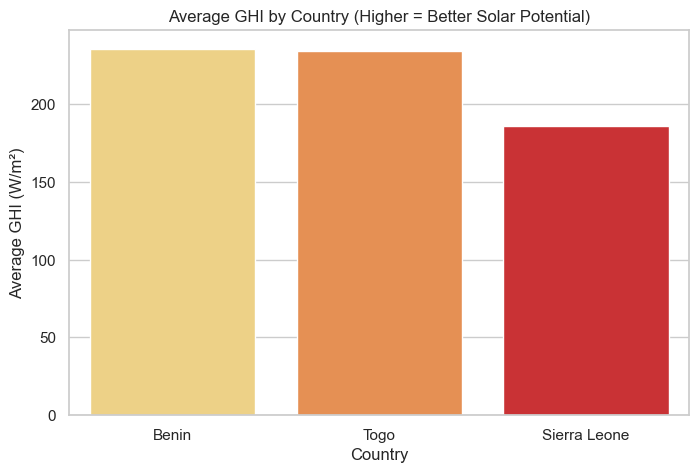

✅ Step 6: Visual summary (Average GHI ranking) displayed


In [7]:
avg_ghi = combined_df.groupby('Country')['GHI'].mean().sort_values(ascending=False)

plt.figure(figsize=(8,5))
sns.barplot(x=avg_ghi.index, y=avg_ghi.values, palette='YlOrRd')
plt.title("Average GHI by Country (Higher = Better Solar Potential)")
plt.ylabel("Average GHI (W/m²)")
plt.xlabel("Country")
plt.show()
print("✅ Step 6: Visual summary (Average GHI ranking) displayed")

# -----------------------------------------------------
# Step 7: Statistical Distribution Comparison 
# -----------------------------------------------------

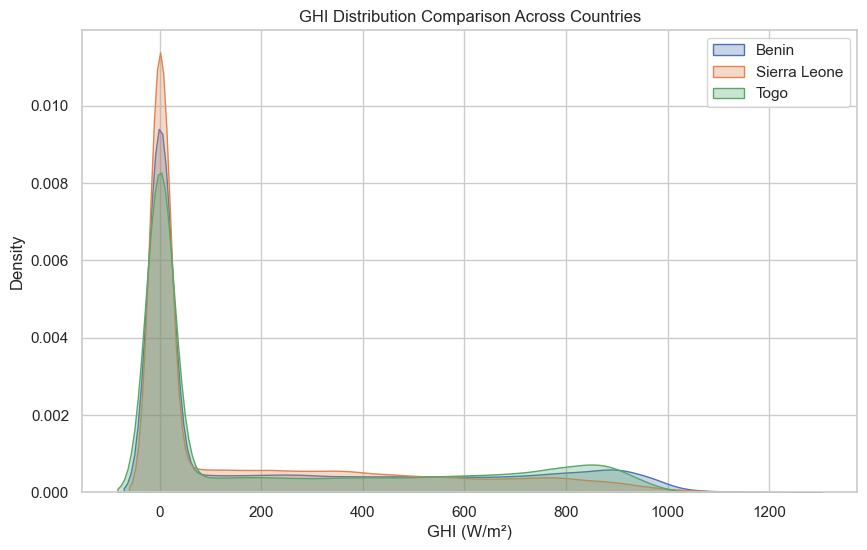

✅ Step 7: GHI Distribution comparison completed


In [8]:
plt.figure(figsize=(10,6))
for country in dfs:
    sns.kdeplot(dfs[country]['GHI'], label=country, fill=True, alpha=0.3)
plt.title("GHI Distribution Comparison Across Countries")
plt.xlabel("GHI (W/m²)")
plt.ylabel("Density")
plt.legend()
plt.show()

print("✅ Step 7: GHI Distribution comparison completed")

# -----------------------------------------------------
# Step 7: Key Observations
# -----------------------------------------------------

In [9]:
print("✅ Step 7: Key Observations\n")

observations = [
    "1. Benin has the highest average GHI (475.5 W/m²), followed by Togo (442.4 W/m²), and Sierra Leone (383.0 W/m²).",
    "2. DNI is also highest in Benin (348.97 W/m²), while Togo and Sierra Leone have much lower DNI, suggesting more direct sunlight in Benin.",
    "3. DHI shows large variability: Benin (mean 222.2 W/m²), Sierra Leone (228.9 W/m²), but Togo's median DHI is extremely low (2.5 W/m²), which may indicate data quality issues or low diffuse irradiance.",
    "4. ANOVA and Kruskal–Wallis tests confirm that differences in GHI, DNI, and DHI across countries are statistically significant (p-value = 0.0).",
    "5. Benin appears to have the best overall solar potential among the three countries, making it the most promising region for PV deployment.",
    "6. Togo and Sierra Leone have lower solar irradiance metrics and higher variability, which may affect PV performance predictions."
]

for obs in observations:
    print(obs)


✅ Step 7: Key Observations

1. Benin has the highest average GHI (475.5 W/m²), followed by Togo (442.4 W/m²), and Sierra Leone (383.0 W/m²).
2. DNI is also highest in Benin (348.97 W/m²), while Togo and Sierra Leone have much lower DNI, suggesting more direct sunlight in Benin.
3. DHI shows large variability: Benin (mean 222.2 W/m²), Sierra Leone (228.9 W/m²), but Togo's median DHI is extremely low (2.5 W/m²), which may indicate data quality issues or low diffuse irradiance.
4. ANOVA and Kruskal–Wallis tests confirm that differences in GHI, DNI, and DHI across countries are statistically significant (p-value = 0.0).
5. Benin appears to have the best overall solar potential among the three countries, making it the most promising region for PV deployment.
6. Togo and Sierra Leone have lower solar irradiance metrics and higher variability, which may affect PV performance predictions.


# ----------------------------------------------------------------------------------------------
# ----------------------------------------------------------------------------------------------
# Step 8: KPI Summary
# ----------------------------------------------------------------------------------------------
# ----------------------------------------------------------------------------------------------

✅ Step 8: Key Performance Indicators (KPI) Summary by Country

                 GHI                    DNI                    DHI         \
                mean median     std    mean median     std    mean median   
Country                                                                     
Benin         235.95    0.0  328.18  165.91    0.0  262.29  111.87    0.0   
Sierra Leone  186.04    0.0  277.67  103.37    0.0  200.76  109.51    0.0   
Togo          234.09    0.0  325.11  186.71    0.0  276.73  102.42    0.0   

                      
                 std  
Country               
Benin         152.49  
Sierra Leone  152.05  
Togo          144.19  


C:\Users\321\AppData\Local\Temp\ipykernel_9908\2041286428.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=kpi_summary.index, y=kpi_summary[(metric,'mean')], palette='Set2')


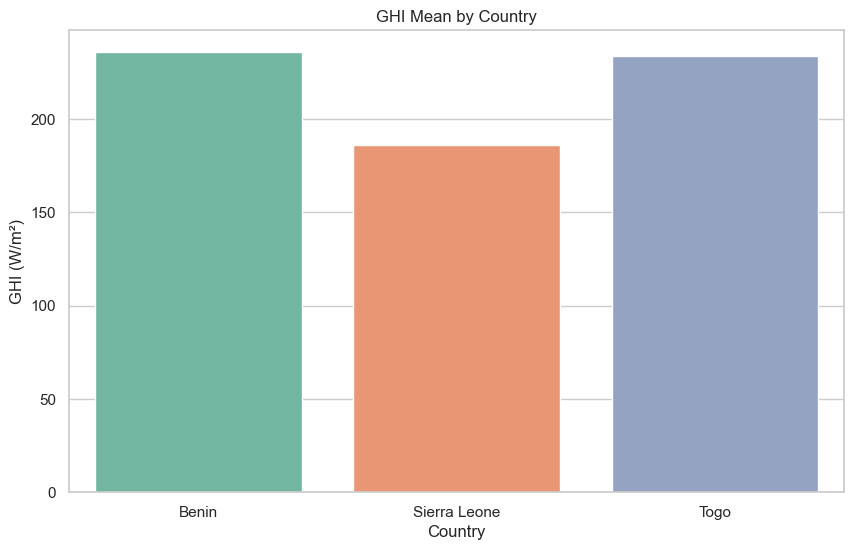

C:\Users\321\AppData\Local\Temp\ipykernel_9908\2041286428.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=kpi_summary.index, y=kpi_summary[(metric,'mean')], palette='Set2')


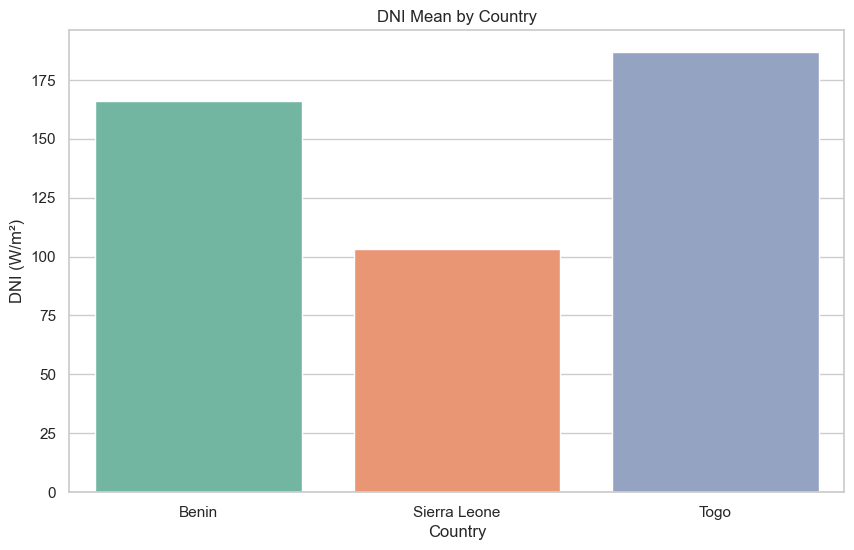

C:\Users\321\AppData\Local\Temp\ipykernel_9908\2041286428.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=kpi_summary.index, y=kpi_summary[(metric,'mean')], palette='Set2')


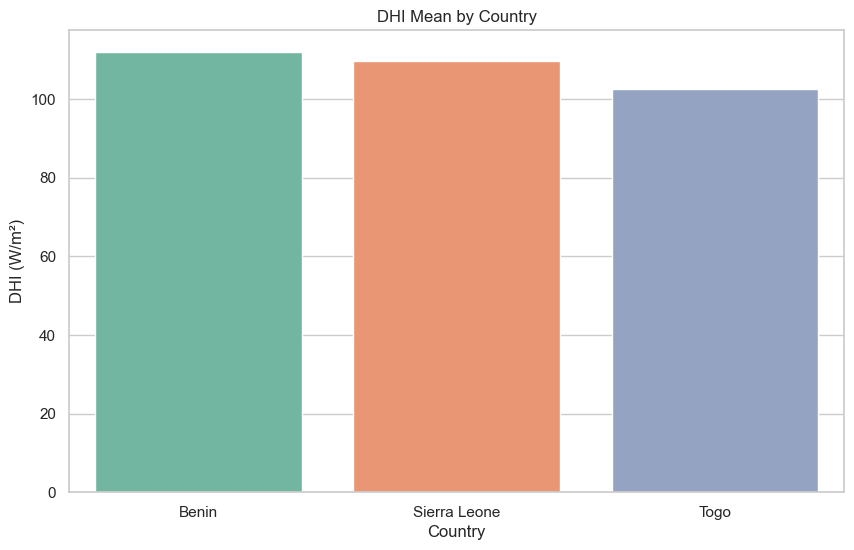

In [10]:
# Step 8: KPI Summary
print("✅ Step 8: Key Performance Indicators (KPI) Summary by Country\n")

# Example: compute mean, median, and standard deviation for key metrics
kpi_metrics = ['GHI', 'DNI', 'DHI']
kpi_summary = combined_df.groupby('Country')[kpi_metrics].agg(['mean', 'median', 'std']).round(2)

print(kpi_summary)

# Optional: visualize KPI summary
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
for metric in kpi_metrics:
    plt.figure(figsize=(10,6))
    sns.barplot(x=kpi_summary.index, y=kpi_summary[(metric,'mean')], palette='Set2')
    plt.title(f'{metric} Mean by Country')
    plt.ylabel(f'{metric} (W/m²)')
    plt.xlabel('Country')
    plt.show()


# -----------------------------------------------------
# Visual Summary - Bar Chart Ranking by Avg GHI
# -----------------------------------------------------

C:\Users\321\AppData\Local\Temp\ipykernel_9908\1455771099.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_ghi.index, y=avg_ghi.values, palette='YlGnBu')


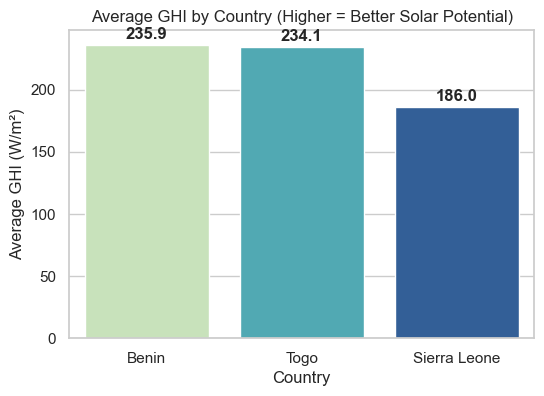

✅ Visual Summary (Avg GHI ranking) displayed


In [11]:
avg_ghi = combined_df.groupby('Country')['GHI'].mean().sort_values(ascending=False)

plt.figure(figsize=(6,4))
sns.barplot(x=avg_ghi.index, y=avg_ghi.values, palette='YlGnBu')
plt.title("Average GHI by Country (Higher = Better Solar Potential)")
plt.ylabel("Average GHI (W/m²)")
plt.xlabel("Country")
for i, v in enumerate(avg_ghi.values):
    plt.text(i, v + 5, f"{v:.1f}", ha='center', fontweight='bold')
plt.show()

print("✅ Visual Summary (Avg GHI ranking) displayed")